Paper Referensi: https://drive.google.com/drive/u/0/folders/1ZwXMC7o_Y8eXnSAVsTdyVs2nENo2cSW-

# Mengubah Citra RGB menjadi Grayscale

## Konversi Citra GrayScale
Konversi citra berwarna ke bentuk citra berskala keabuan. Namun, biasanya citra berskala keabuan perlu dilakukan konversi ke citra biner.

Konversi citra berwarna ke bentuk citra berskala keabuan menggunakan rumus sebagai berikut:
${I=a\times R+b \times G+c \times B}$

${a + b + c = 1}$

https://dosen.itats.ac.id/farida/2020/02/10/mengenal-pengolahan-citra-digital-menggunakan-python-yuuukkk/

In [41]:
# matplotlib untuk menampilkan visualisasi grafik pada citra
# cv2 untuk input, menampilkan, dan simpan citra

import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os.path import basename
from os.path import splitext 
from PIL import Image

In [7]:
img = cv2.imread('./BrainDataset/testA/ct10.png')
im = mpimg.imread('./BrainDataset/testA/ct10.png')

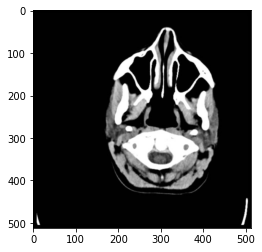

In [11]:
# convert image to RGB Color for Matplotlib
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# rgb image represent as a 2-d array
# print(rgb_img)

# show RGB Image with Matplotlib
plt.imshow(rgb_img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


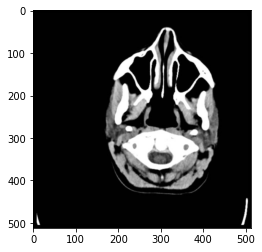

In [9]:
# convert Image to Grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# grayscale image represent as a 2-d array
print(gray_img)

# show Grayscale Image with Matplotlib
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))

## Menghitung jumlah piksel untuk masing-masing channel warna (Red, Green, Blue)

https://kotakode.com/pertanyaan/236/Bagaimana-cara-mencari-nilai-RGB--gambar%3F-

In [12]:
# menampilkan ukuran tinggi, lebar, kedalaman (channel gambar = 3 -> RGB)
print(img.shape)

# mengakses pixel warna biru 
print(img[0][0][0])

# mengakses pixel warna hijau
print(img[0][0][1])

# mengakses pixel warna merah
print(img[0][0][2])

(512, 512, 3)
0
0
0


jumlah pixel warna biru, hijau, dan merah adalah 0, sehingga citra input adalah grayscale

## Menampilkan citra dalam bentuk histogram

https://pemrogramanmatlab.com/2017/07/26/histogram-citra/

![Grayscale Histogram](./asset/histogram-citra.jpg)

Histogram merupakan diagram yang menggambarkan distribusi frekuensi nilai intensitas pixel dalam suatu citra. 

Sumbu horizontal merupakan nilai intensitas piksel. Sedangkan sumbu vertikal merupakan frekuensi/jumlah piksel.

a. Citra Gelap
Nilai intensitas mendekati 0. Cenderung pada daerah sebelah kiri histogram

![Citra Gelap](./asset/citra-gelap.jpg)

b. Citra Terang
Nilai intensitas mendekati 255. Cenderung pada daerah sebelah kanan

![Citra Terang](./asset/citra-terang.jpg)

c. Kontras Rendah
Memiliki range nilai intensitas yang sempit. Contoh citra memiliki range intensitas 74-224.

![Citra Kontras Rendah](./asset/citra-dengan-kontras-rendah.jpg)

d. Kontras Tinggi
Memiliki range nilai intensitas yang lebar. Range antara 0-255

![Citra Kontras Tinggi](./asset/citra-dengan-kontras-tinggi.jpg)

https://github.com/imambungo/histogram

In [36]:
# ambil nama file
def get_file_name(file_path):
    # https://stackoverflow.com/a/678266/9157799
    return splitext(basename(file_path))[0]

# tampilkan histogram
def tampilkan_histogram(r, g, b, gambar):
    intensitas = list(range(256))
    lebar_bar = 0.3

    # https://stackoverflow.com/q/9304408/9157799
    intensitas = [i-lebar_bar for i in intensitas]
    # https://stackoverflow.com/q/14270391/9157799
    pyplot.bar(intensitas, r, width=lebar_bar, color='r')

    intensitas = [i+lebar_bar for i in intensitas]
    pyplot.bar(intensitas, g, width=lebar_bar, color='g')

    intensitas = [i+lebar_bar for i in intensitas]
    pyplot.bar(intensitas, b, width=lebar_bar, color='b')

    pyplot.title('Histogram ' + gambar)
    pyplot.xlabel('Intensitas')
    pyplot.ylabel('Kemunculan')
    pyplot.legend(['R', 'G', 'B'])
    pyplot.show()

# buat histogram
def histogram(gambar):
    GAMBAR = Image.open(gambar)
    PIXEL = GAMBAR.load()

    ukuran_horizontal = GAMBAR.size[0]
    ukuran_vertikal = GAMBAR.size[1]

    gambar_r = Image.new('RGB', (ukuran_horizontal, ukuran_vertikal))
    pixel_r = gambar_r.load()

    gambar_g = Image.new('RGB', (ukuran_horizontal, ukuran_vertikal))
    pixel_g = gambar_g.load()

    gambar_b = Image.new('RGB', (ukuran_horizontal, ukuran_vertikal))
    pixel_b = gambar_b.load()

    # https://stackoverflow.com/q/10712002/9157799
    r = [0] * 256
    g = [0] * 256
    b = [0] * 256

    for x in range(ukuran_horizontal):
        for y in range(ukuran_vertikal):
            intensitas_r = PIXEL[x, y][0]
            intensitas_g = PIXEL[x, y][1]
            intensitas_b = PIXEL[x, y][2]
            r[intensitas_r] += 1
            g[intensitas_g] += 1
            b[intensitas_b] += 1
            pixel_r[x, y] = (intensitas_r, 0, 0)
            pixel_g[x, y] = (0, intensitas_g, 0)
            pixel_b[x, y] = (0, 0, intensitas_b)

    gambar_r.save('./HistogramDataset/rgb/' + get_file_name(gambar) + '_r.jpg')
    gambar_g.save('./HistogramDataset/rgb/' + get_file_name(gambar) + '_g.jpg')
    gambar_b.save('./HistogramDataset/rgb/' + get_file_name(gambar) + '_b.jpg')

    tampilkan_histogram(r, g, b, gambar)

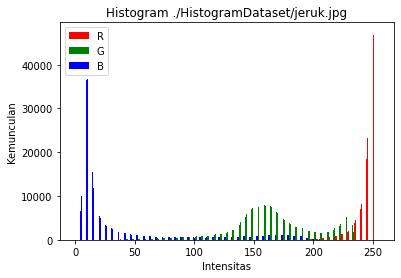

In [42]:
# Jika diterapkan citra grayscale akan error

# histogram('./HistogramDataset/lena.png')

histogram('./HistogramDataset/jeruk.jpg')

https://www.ivanjul.com/histogram-di-opencv-python/

Histogram using OpenCV

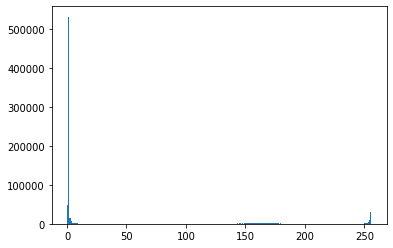

In [43]:
# menampilkan citra input 

plt.hist(img.ravel(),256,[0,256])
plt.show()

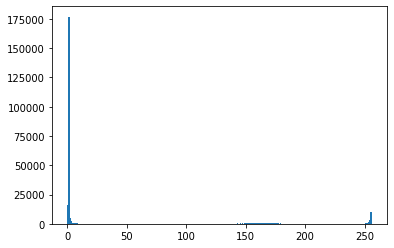

In [44]:
# menampilkan histogram citra grayscale 

plt.hist(gray_img.ravel(),256,[0,256])
plt.show()

pada histogram citra grayscale tampak garis lebih banyak berada di titik x=0 dibandingkan dengan citra rgb. Walau keduanya sama-sama sebagian besar garis berada di titik x=0 dan sisa sebagiannya berada di titik x=150 dan x=250